In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df_top = pd.read_csv('rym_top_5000_all_time.csv')
#Rename for column name for merging
df_top = df_top.rename(columns = {"Artist Name":"Artist"})
df_top.head(10)

,Ranking,Album,Artist,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379
5,6.0,Loveless,My Bloody Valentine,4 November 1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,"49,887",1223
6,7.0,The Dark Side of the Moon,Pink Floyd,23 March 1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,"57,622",1549
7,8.0,Abbey Road,The Beatles,26 September 1969,Pop Rock,"melodic, warm, male vocals, bittersweet, summe...",4.25,"44,544",961
8,9.0,The Velvet Underground & Nico,The Velvet Underground & Nico,12 March 1967,"Art Rock, Experimental Rock","drugs, sexual, raw, urban, noisy, nihilistic, ...",4.23,"45,570",929
9,10.0,The Rise and Fall of Ziggy Stardust and the Sp...,David Bowie,16 June 1972,"Glam Rock, Pop Rock","science fiction, melodic, anthemic, concept al...",4.26,"39,501",721


In [3]:
df_top.shape

(5000, 9)

In [4]:
df_ratings = pd.read_csv('album_ratings.csv')
df_ratings.head(10)

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
5,Bon Iver,Blood Bank EP,January,20,2009,EP,Jagjaguwar,Indie Folk,72.0,15.0,8.4,71.0,74,14,80,241
6,M. Ward,Hold Time,February,17,2009,LP,Merge Records,Folk,79.0,31.0,8.8,23.0,76,24,76,22
7,Lily Allen,"It's Not Me, It's You",February,10,2009,LP,EMI/Parlophone,Pop,71.0,32.0,8.1,155.0,68,29,79,209
8,Morrissey,Years of Refusal,February,17,2009,LP,Attack/Lost Highway,Alternative Rock,79.0,32.0,8.0,37.0,76,26,74,45
9,The Decemberists,The Hazards of Love,March,24,2009,LP,Capitol Records,Indie Rock,73.0,31.0,8.5,98.0,73,29,76,66


In [5]:
df_ratings.shape

(32358, 16)

In [6]:
#Change column name so we can merge
df_ratings = df_ratings.rename(columns = {'Title':'Album'})
df_ratings.head()

,Artist,Album,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44


In [7]:
df_ratings.shape

(32358, 16)

In [8]:
df_merged = df_top.merge(df_ratings,on=['Album','Artist']).reset_index(drop=True)
df_merged.head()

,Ranking,Album,Artist,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,Release Month,...,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,June,...,"Parlophone, Capitol",Alternative Rock,NaN,NaN,NaN,NaN,91,12,93,3204
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,September,...,Harvest,Progressive Rock,NaN,NaN,NaN,NaN,100,4,91,1607
2,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,October,...,Capitol / EMI,Experimental Rock,80.0,24.0,8.9,1129.0,85,13,92,2862
3,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,March,...,Aftermath / Interscope,Hip Hop,96.0,44.0,8.8,3616.0,95,42,93,4530
4,6.0,Loveless,My Bloody Valentine,4 November 1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,"49,887",1223,November,...,Creation,Shoegaze,NaN,NaN,NaN,NaN,94,9,91,1634


In [9]:
df_merged.columns,df_merged.shape

(Index(['Ranking', 'Album', 'Artist', 'Release Date', 'Genres', 'Descriptors',
        'Average Rating', 'Number of Ratings', 'Number of Reviews',
        'Release Month', 'Release Day', 'Release Year', 'Format', 'Label',
        'Genre', 'Metacritic Critic Score', 'Metacritic Reviews',
        'Metacritic User Score', 'Metacritic User Reviews', 'AOTY Critic Score',
        'AOTY Critic Reviews', 'AOTY User Score', 'AOTY User Reviews'],
       dtype='object'), (2308, 23))

In [10]:
df_merged['AOTY Critic Score'].hist(), df_merged['Metacritic Critic Score'].hist()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a560c75be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a560c75be0>)

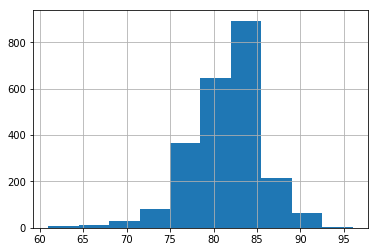

In [11]:
df_merged['AOTY User Score'].hist()

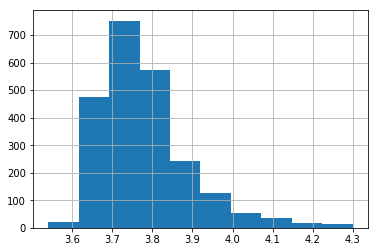

In [12]:
df_merged['Average Rating'].hist()

In [13]:
#Number of albums, number of rows
df_merged['Album'].unique().shape

(2265,)

It looks like we went from 5000 to 2265 ratings after merging. The ratings dataset has 32k+ rows in it, so I'm guessing there are some repeats or something that dont get included in the merge.

In [17]:
df_merged.to_csv("merged_features.csv")

In [16]:
df_merged['Album']

0                                             OK Computer
1                                      Wish You Were Here
2                                                   Kid A
3                                     To Pimp a Butterfly
4                                                Loveless
5                               The Dark Side of the Moon
6                                              Abbey Road
7                           The Velvet Underground & Nico
8       The Rise and Fall of Ziggy Stardust and the Sp...
9                                                Revolver
10                                            Madvillainy
11                                        Remain in Light
12                                            In Rainbows
13                                         A Love Supreme
14                                               Paranoid
15                                           Kind of Blue
16                                             Pet Sounds
17            